In [1]:
%%capture
!pip install PyQt5

In [99]:
import random

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [ ]:
% matplotlib notebook


class Paraboloid:
    def __init__(self, a, height):
        """
        
        :param a: paraboloid focus param
        :param height: 
        """
        self.a = a
        self.height = height
        # calculate height from parametric z equation
        self.h = np.sqrt(height / a)

    def get_point(self, t, theta):
        """
        generate cartesian coords from parametric
        :param t: 
        :param theta: 
        :return: 
        """
        return t * np.cos(theta), t * np.sin(theta), self.a * t ** 2

    def get_random_point(self):
        """
        
        :return: (x, y, z) of random point on paraboloid 
        """
        r1 = random.random()
        r2 = random.random()
        t = self.h * r1
        theta = 2 * np.pi * r2
        return self.get_point(t, theta)

    def plot_paraboloid(self, ax):
        """
        plot paraboloid on ax matplotlib
        :param ax: 
        :return: 
        """
        t, theta = np.mgrid[0:self.h:0.1, 0:2 * np.pi:100j]
        ax.contour3D(*self.get_point(t, theta), 120, cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')


def get_distance(point1, point2):
    """
    Return distance between two points with cartesian coords
    :param point1: 
    :param point2: 
    :return: 
    """
    return np.linalg.norm([
        point1[0] - point2[0],
        point1[1] - point2[1],
        point1[2] - point2[2]
    ])


def win(points_a, point_b, r):
    """
    Check win for gamer A
    :param points_a: [(x, y, z), ...]
    :param point_b: (x, y, z)
    :param r: b point radius
    :return: True if A win else False
    """
    for point_a in points_a:
        if get_distance(point_a, point_b) <= r:
            return True
    return False


def game(a, height, r, s, plot=False):
    """
    
    :param a: paraboloid param 
    :param height: paraboloid max height
    :param r: radius of point B
    :param s: count of points A
    :param plot: plot graphic representation or not
    :return: True if win A, else False
    """
    p = Paraboloid(a, height)

    random_a_points = [p.get_random_point() for i in range(s)]
    random_b_point = p.get_random_point()

    if plot:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        p.plot_paraboloid(ax)
        for point_a in random_a_points:
            ax.scatter(*point_a, c='r')
        ax.scatter(*random_b_point, s=np.pi * r ** 2 * 100, c='g')

    return win(random_a_points, random_b_point, r)


<IPython.core.display.Javascript object>


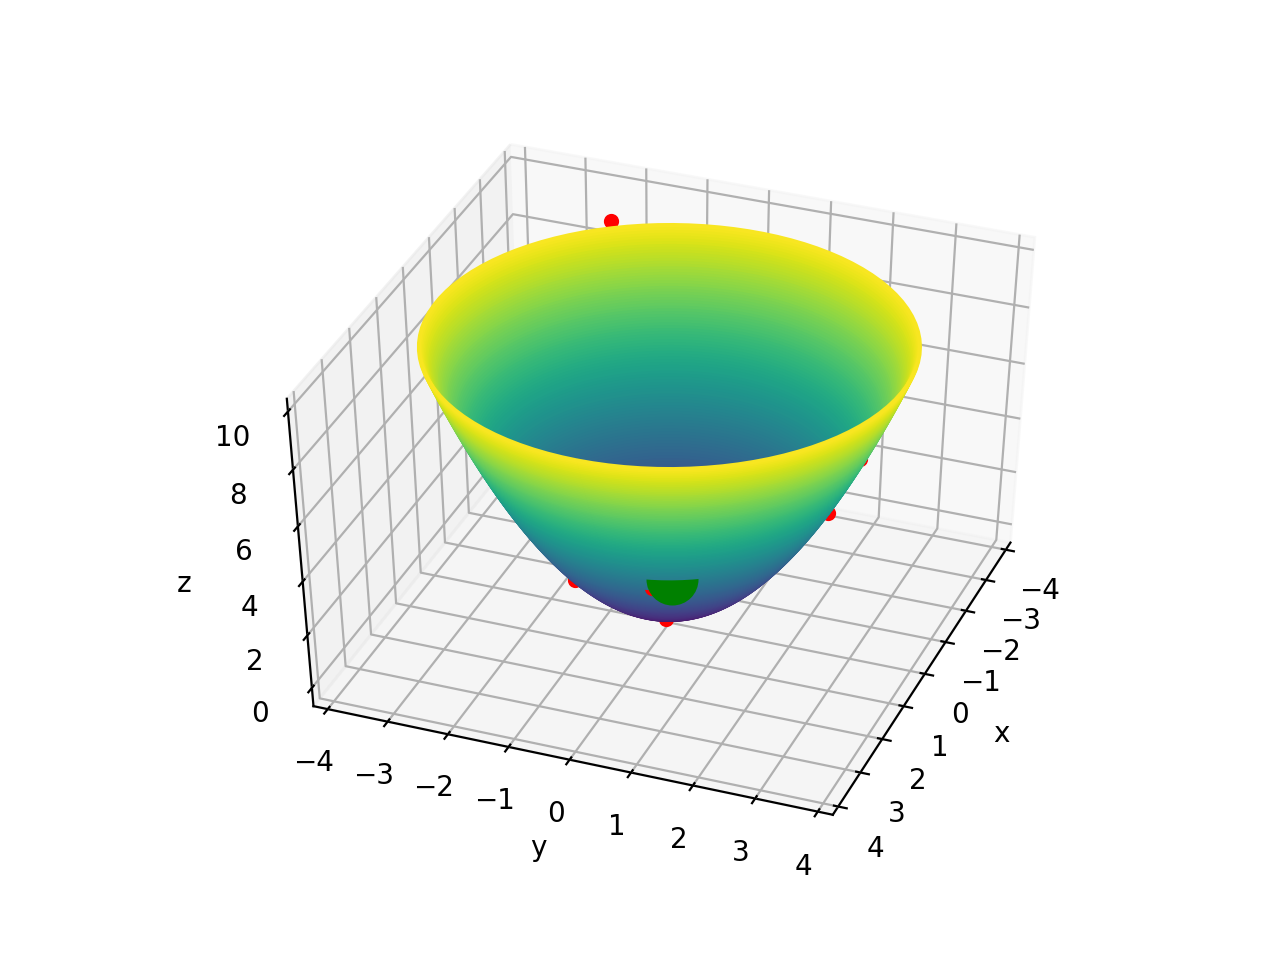

True

In [140]:
game(a=0.7, height=10, r=1, s=20, plot=True)

<IPython.core.display.Javascript object>


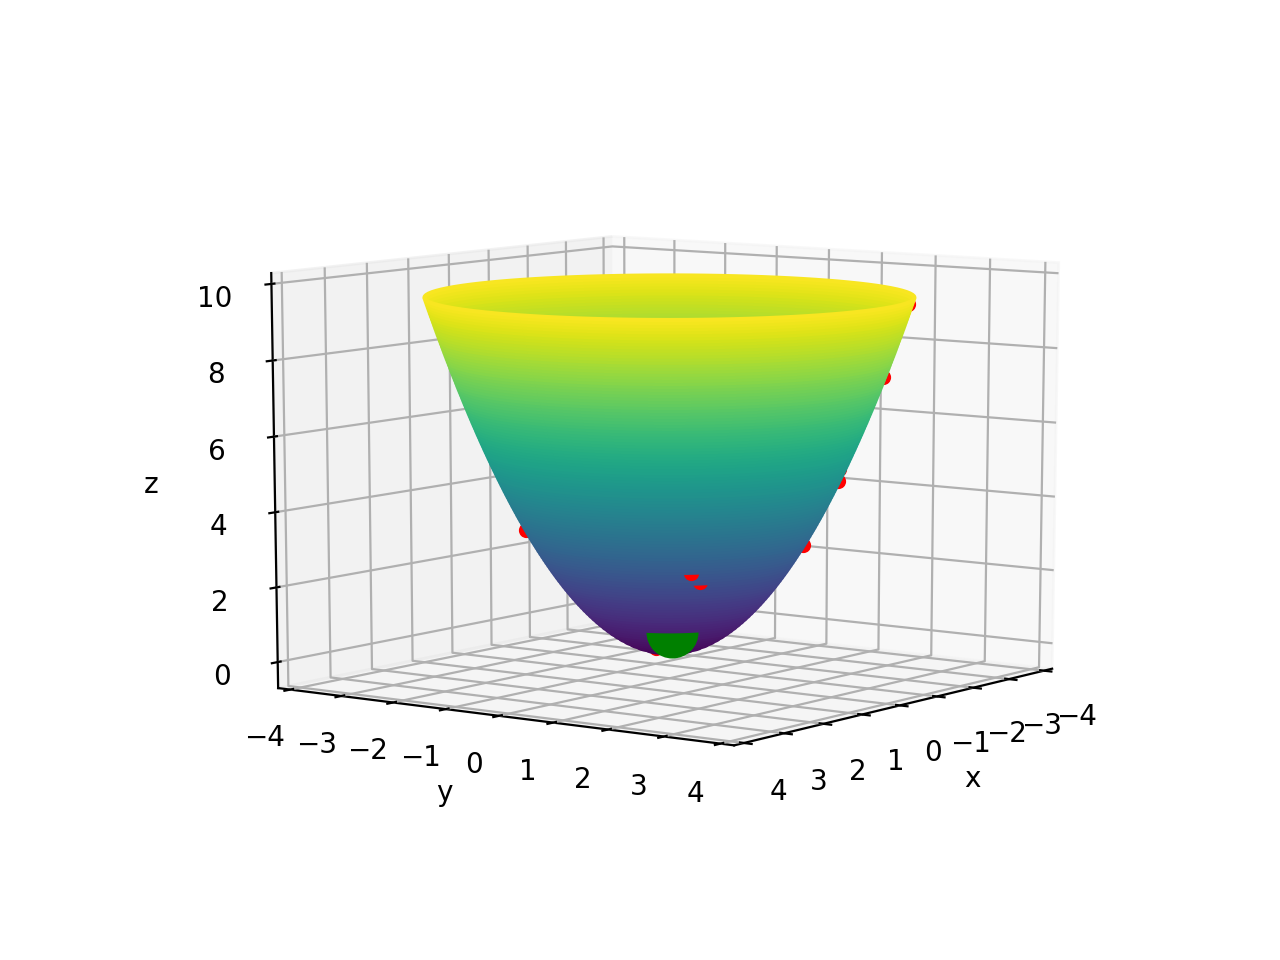

False

In [141]:
game(a=0.7, height=10, r=1, s=20, plot=True)

In [153]:
def calculate_value(a=0.7, height=100, r=1, s=20, games_count=1000):
    wins = 0
    for _ in range(games_count):
        wins += 1 if game(a, height, r, s) else 0
    return wins / games_count

In [154]:
# изначальная цена игры при зафиксированных параметрах
calculate_value(a=0.7, height=100, r=1, s=20, games_count=1000)

0.102

In [155]:
# увеличение цены игры при уменьшении высоты параболоида
calculate_value(a=0.7, height=10, r=1, s=20, games_count=1000)

0.502

In [157]:
# увеличение цены игры при уменьшении увеличении радиуса точек
calculate_value(a=0.7, height=100, r=2, s=20, games_count=1000)

0.224

In [172]:
# увеличение цены игры при уменьшении увеличении количества точек
calculate_value(a=0.7, height=100, r=1, s=50, games_count=1000)

0.185

In [173]:
# увеличение точности цены игры при увеличении количества игр
calculate_value(a=0.7, height=100, r=1, s=20, games_count=10000)

0.1026

In [174]:
# изменение цены игры при изменении фокального параметра параболоида
calculate_value(a=2.7, height=100, r=1, s=20, games_count=1000)

0.148